<a href="https://www.kaggle.com/code/hossamelsrah/project-ocr-using-crnn-model?scriptVersionId=256288945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
#importing important libs
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Dataload

In [5]:
#make new folder to put the data in
!mkdir OCR_data

In [6]:
#to download the Data
!pip install gdown

In [7]:
#Downloading Dataset from Drive
import gdown
import zipfile
import os

# Google Drive file ID
file_id = '1lmz_vfsXJi7rMvLZ9jMAEQKa_iV1tH5w'
# Destination file name
output = 'updated_OCR_Text.zip'

# Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', output, quiet=False)

# Path to the downloaded ZIP file
zip_path = 'updated_OCR_Text.zip'
# Path to extract the contents
extract_path = 'OCR_data'

# Create the extract path if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'Contents extracted to: {extract_path}')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1lmz_vfsXJi7rMvLZ9jMAEQKa_iV1tH5w
From (redirected): https://drive.google.com/uc?export=download&id=1lmz_vfsXJi7rMvLZ9jMAEQKa_iV1tH5w&confirm=t&uuid=9eb40c8b-5721-4340-83e5-55b6139fe01e
To: /kaggle/working/updated_OCR_Text.zip
100%|██████████| 285M/285M [00:02<00:00, 105MB/s]  


Contents extracted to: OCR_data


In [8]:
!cp /content/updated_OCR_Text.zip /content/drive/MyDrive/First Data Science project/updated_OCR_Text.zip

cp: target 'project/updated_OCR_Text.zip' is not a directory


# DataRead

In [9]:
#Get list dirs of Data
path = 'OCR_data'
dir_list = os.listdir(path)

In [10]:
#Take Unique names to relate image to label by names
dir_list = list(set([*map(lambda x: x.split(".")[0],dir_list)]))
len(dir_list)

19992

In [11]:
#Reading Dataset images and Labels into lists
X = []
y = []
for i in dir_list:
    image_dir = os.path.join(path, i) + ".jpg"
    txt_dir = os.path.join(path, i) + ".txt"
    X.append(cv2.cvtColor(cv2.imread(image_dir), cv2.COLOR_BGR2RGB))
    y.append(open(txt_dir, 'r').read())

In [12]:
#Function to display Images
import matplotlib.pyplot as plt
import numpy as np
import math

def display_images(images, titles=None):
    """
    Display a list of images.

    Parameters:
    images (list): List of images as NumPy arrays.
    titles (list): List of titles for the images (optional).
    """
    num_images = len(images)
    if titles and len(titles) != num_images:
        raise ValueError("The length of titles must match the number of images.")

    cols = 5
    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 1 * rows))
    axes = axes.flatten()

    for ax in axes[num_images:]:
        ax.axis('off')

    for i, img in enumerate(images):
        ax = axes[i]
        ax.imshow(img)
        if titles:
            ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

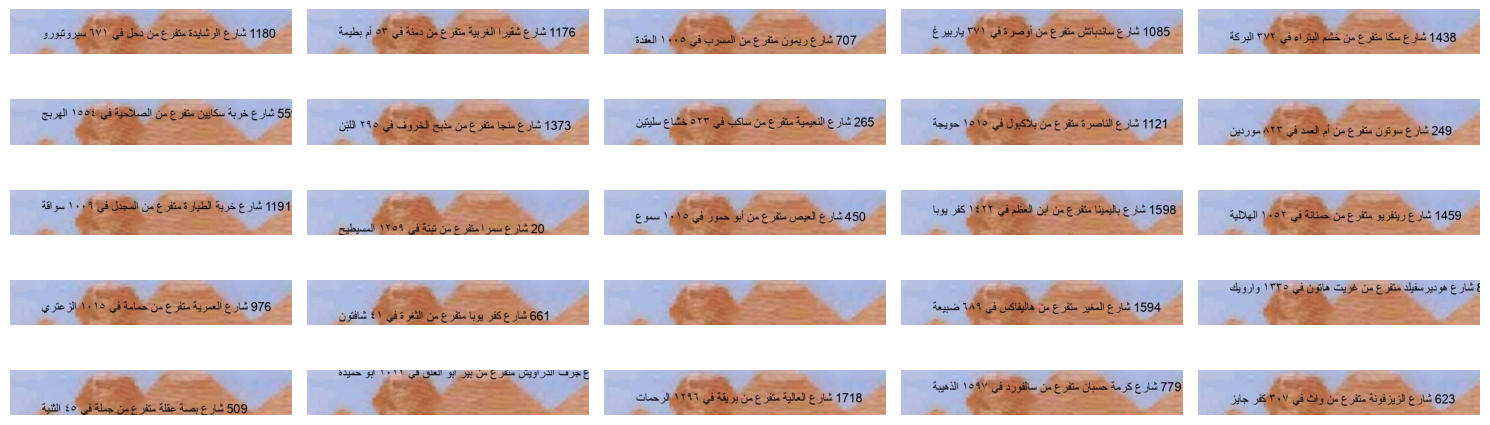

In [13]:
display_images(X[:25])

In [14]:
#converting list to numpy array and see the shape
X = np.array(X)
X.shape

(19992, 80, 500, 3)

In [15]:
#convert txt data list to np.array
y = np.array(y)
y.shape

(19992,)

In [16]:
#flattten all txt to Extract chars list
flatten_label = " ".join(y)
len(flatten_label)

1034693

In [17]:
print(flatten_label[:100])

1180 شارع الرشايدة متفرع من دحل في ٦٧١ سبروتبورو 1176 شارع شقيرا الغربية متفرع من دمنة في ٥٣ أم بطيم


In [18]:
#Get char list
char_list = [*set(flatten_label)]
len(char_list)

64

In [19]:
char_list

['ظ',
 'ر',
 ' ',
 'ص',
 'ى',
 '٩',
 'ق',
 '0',
 '٠',
 '9',
 'ل',
 '١',
 'ض',
 'ك',
 '3',
 'ú',
 '4',
 'ؤ',
 '٤',
 '2',
 'ي',
 'و',
 'إ',
 'b',
 'c',
 'س',
 'ة',
 'ن',
 'ا',
 'ث',
 'ج',
 'ح',
 '٦',
 'ّ',
 '٨',
 'i',
 'ف',
 '٥',
 'ه',
 'r',
 '8',
 'خ',
 'ش',
 'ط',
 '٢',
 '6',
 'ء',
 'ذ',
 'ع',
 'ب',
 '٣',
 'A',
 'a',
 'أ',
 'ئ',
 'غ',
 'ز',
 '7',
 'ت',
 'م',
 'د',
 '5',
 '٧',
 '1']

# Data Preprocessing

## Grayscale Conversion

In [20]:
import numpy as np
import cv2

# We will create a new list to store the converted images
X_gray_list = []
for img in X:
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_img = np.expand_dims(gray_img, axis=-1)
    X_gray_list.append(gray_img)

# Convert the list back to a NumPy array for efficient processing
X_gray = np.array(X_gray_list)

# Print the new shape to confirm the conversion
print("New shape after Grayscale conversion:", X_gray.shape)

New shape after Grayscale conversion: (19992, 80, 500, 1)


## Normalization

In [21]:
X_preprocessed = X_gray / 255.0

# Print the new shape and data type to show that the preprocessing is complete
print("New shape after Normalization:", X_preprocessed.shape)
print("The data type is now float:", X_preprocessed.dtype)
print("First image's pixel value after Normalization:", X_preprocessed[0][0][0])

New shape after Normalization: (19992, 80, 500, 1)
The data type is now float: float64
First image's pixel value after Normalization: [0.76470588]


# DataPreperation

## Text Cleaning

In [22]:
# 1. Define a clean character set (the model's vocabulary)
char_list_cleaned = [
    ' ', 'أ', 'إ', 'آ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر',
    'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م',
    'ن', 'ه', 'و', 'ي', 'ى', 'ء', 'ئ', 'ؤ', 'ة', 'ى', '٠', '١', '٢', '٣',
    '٤', '٥', '٦', '٧', '٨', '٩', '0', '1', '2', '3', '4', '5', '6', '7',
    '8', '9'
]

# 2. Create character-to-integer and integer-to-character mappings
char_to_num = {char: idx for idx, char in enumerate(char_list_cleaned)}
num_to_char = {idx: char for idx, char in enumerate(char_list_cleaned)}

print(f"Number of characters in the cleaned vocabulary: {len(char_list_cleaned)}")
print("Example mapping: 'أ' ->", char_to_num.get('أ'))
print("Example mapping: 1 ->", num_to_char.get(1))

Number of characters in the cleaned vocabulary: 58
Example mapping: 'أ' -> 1
Example mapping: 1 -> أ


In [23]:
import numpy as np

# 3. Clean and encode the labels
# This is a key step to convert text strings to integer sequences
y_encoded = []
for label in y:
    encoded_label = []
    for char in label:
        if char in char_to_num:
            encoded_label.append(char_to_num[char])
    y_encoded.append(encoded_label)

# Let's check the first few encoded labels
print("\nFirst 5 original labels:")
for i in range(5):
    print(y[i])

print("\nFirst 5 encoded labels:")
for i in range(5):
    print(y_encoded[i])


First 5 original labels:
1180 شارع الرشايدة متفرع من دحل في ٦٧١ سبروتبورو
1176 شارع شقيرا الغربية متفرع من دمنة في ٥٣ أم بطيمة
707 شارع ريمون متفرع من المسرب في ١٠٠٥ العقدة
1085 شارع ساندباتش متفرع من أوصرة في ٣٧١ ياربيرغ
1438 شارع سكا متفرع من خشم البتراء في ٣٧٢ البركة

First 5 encoded labels:
[49, 49, 56, 48, 0, 16, 4, 13, 21, 0, 4, 26, 13, 16, 4, 31, 11, 36, 0, 27, 6, 23, 13, 21, 0, 27, 28, 0, 11, 9, 26, 0, 23, 31, 0, 44, 45, 39, 0, 15, 5, 13, 30, 6, 5, 30, 13, 30]
[49, 49, 55, 54, 0, 16, 4, 13, 21, 0, 16, 24, 31, 13, 4, 0, 4, 26, 22, 13, 5, 31, 36, 0, 27, 6, 23, 13, 21, 0, 27, 28, 0, 11, 27, 28, 36, 0, 23, 31, 0, 43, 41, 0, 1, 27, 0, 5, 19, 31, 27, 36]
[55, 48, 55, 0, 16, 4, 13, 21, 0, 13, 31, 27, 30, 28, 0, 27, 6, 23, 13, 21, 0, 27, 28, 0, 4, 26, 27, 15, 13, 5, 0, 23, 31, 0, 39, 38, 38, 43, 0, 4, 26, 21, 24, 11, 36]
[49, 48, 56, 53, 0, 16, 4, 13, 21, 0, 15, 4, 28, 11, 5, 4, 6, 16, 0, 27, 6, 23, 13, 21, 0, 27, 28, 0, 1, 30, 17, 13, 36, 0, 23, 31, 0, 41, 45, 39, 0, 31, 4, 13, 5, 31

# Modeling CRNN + CTC Loss function

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# --- Define Global Variables (make sure these are defined) ---
vocab_size = 59
input_shape = (80, 500, 1)

# --- CORRECTED CRNN Model Architecture ---
def build_crnn_model():
    """
    Builds the CRNN model architecture with corrected Reshape calculation.
    """
    inputs = Input(shape=input_shape, name="image_input")

    # CNN Feature Extraction
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name="Conv1")(inputs)
    x = MaxPooling2D(pool_size=(2, 2), name="Pool1")(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name="Conv2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="Pool2")(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name="Conv3")(x)
    x = MaxPooling2D(pool_size=(2, 1), name="Pool3")(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name="Conv4")(x)
    x = MaxPooling2D(pool_size=(2, 1), name="Pool4")(x)
    x = BatchNormalization()(x)

    # Reshape for RNN input
    # After 4 pooling layers, the shape is (5, 125, 512)
    # We want to reshape it to (125, 5 * 512) -> (125, 2560)
    # The correct calculation for the new shape is:
    time_steps = input_shape[1] // (2 * 2 * 1 * 1) # 500 / 4 = 125
    features = (input_shape[0] // (2 * 2 * 2 * 2)) * 512 # 80 / 16 = 5. So 5 * 512 = 2560
    new_shape = (time_steps, features)

    x = Reshape(target_shape=new_shape, name="Reshape_for_RNN")(x)

    # RNN/LSTM part
    x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25), name="BiLSTM1")(x)
    x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25), name="BiLSTM2")(x)

    # Output Layer
    outputs = Dense(vocab_size, activation='softmax', name="output")(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [27]:
# --- Define the Custom CTC Loss Layer ---
class CTCLayer(tf.keras.layers.Layer):
    def __init__(self, name=None, **kwargs):
        super().__init__(name=name)
        self.loss_fn = K.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(tf.reduce_mean(loss))
        return y_pred

# --- Build the Training Model ---
def build_training_model():
    crnn_model = build_crnn_model()
    labels = Input(name="labels", shape=(None,), dtype="float32")
    input_length = Input(name="input_length", shape=(1,), dtype="int64")
    label_length = Input(name="label_length", shape=(1,), dtype="int64")
    loss_output = CTCLayer(name="ctc_loss")(
        y_true=labels, y_pred=crnn_model.output, input_length=input_length, label_length=label_length
    )
    training_model = Model(
        inputs=[crnn_model.input, labels, input_length, label_length],
        outputs=loss_output
    )
    return training_model

# Build and Compile the training model ---
training_model = build_training_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) 
training_model.compile(optimizer=optimizer)
training_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 80, 500,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 500,   │        640 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Pool1               │ (None, 40, 250,   │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 250,   │        256 │ Pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 40, 250,   │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Pool2               │ (None, 20, 125,   │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 125,   │        512 │ Pool2[0][0]       │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv3 (Conv2D)      │ (None, 20, 125,   │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Pool3               │ (None, 10, 125,   │          0 │ Conv3[0][0]       │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 125,   │      1,024 │ Pool3[0][0]       │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv4 (Conv2D)      │ (None, 10, 125,   │  1,180,160 │ batch_normalizat… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Pool4               │ (None, 5, 125,    │          0 │ Conv4[0][0]       │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 125,    │      2,048 │ Pool4[0][0]       │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Reshape_for_RNN     │ (None, 125, 2560) │          0 │ batch_normalizat… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM1             │ (None, 125, 512)  │  5,769,216 │ Reshape_for_RNN[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM2             │ (None, 125, 512)  │  1,574,912 │ BiLSTM1[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_length        │ (None, 1)         │          0 │ -               

 Total params: 8,928,059 (34.06 MB)

 Trainable params: 8,926,139 (34.05 MB)

 Non-trainable params: 1,920 (7.50 KB)

# Training

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42
)

# Now, prepare the input data for the training model
input_length_train = np.ones((len(x_train), 1)) * 125
label_length_train = np.array([len(label) for label in y_train])
padded_y_train = tf.keras.preprocessing.sequence.pad_sequences(
    y_train, padding='post', value=0
)

# And for the validation set
input_length_val = np.ones((len(x_val), 1)) * 125
label_length_val = np.array([len(label) for label in y_val])
padded_y_val = tf.keras.preprocessing.sequence.pad_sequences(
    y_val, padding='post', value=0
)

# Train the model using the separated data
history = training_model.fit(
    x=[x_train, padded_y_train, input_length_train, label_length_train],
    y=np.zeros(len(x_train)),
    batch_size=32,
    epochs=25,
    validation_data=([x_val, padded_y_val, input_length_val, label_length_val], np.zeros(len(x_val)))
)
history

Epoch 1/25


I0000 00:00:1754485516.741877     143 cuda_dnn.cc:529] Loaded cuDNN version 90300


500/500 ━━━━━━━━━━━━━━━━━━━━ 160s 288ms/step - loss: 150.0363 - val_loss: 213.8213
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 289ms/step - loss: 92.8129 - val_loss: 89.5874
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 289ms/step - loss: 88.7417 - val_loss: 86.8762
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 288ms/step - loss: 86.2602 - val_loss: 84.9514
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 289ms/step - loss: 84.5260 - val_loss: 83.9893
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 288ms/step - loss: 82.7326 - val_loss: 81.8604
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 288ms/step - loss: 80.2924 - val_loss: 79.6670
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 288ms/step - loss: 77.5517 - val_loss: 77.0321
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 288ms/step - loss: 75.2997 - val_loss: 75.1299
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 289ms/step - loss: 73.4703 - val_loss: 73.7104
Epoch 11/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 288ms/step - loss: 71.2009 - val_loss: 71.

In [29]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation loss from the history object.
    """
    # Get the loss and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get the number of epochs
    epochs = range(1, len(loss) + 1)
    
    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

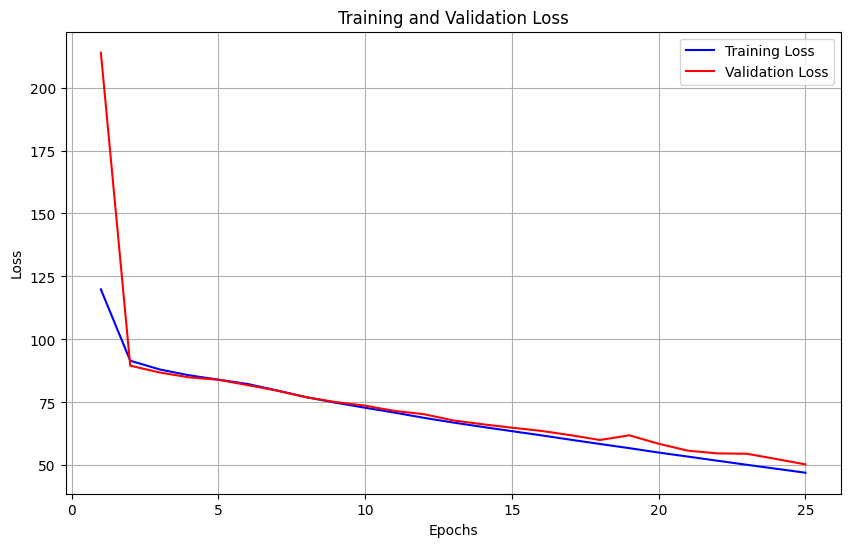

In [30]:
plot_training_history(history)

`The consistently decreasing loss shows that the model is training very well and still.`
The Model Is still learning With good fitting 
- so We can give more Epochs
- also we can use EarlyStopping & ModelCheckpoint

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
# 1. EarlyStopping: Stops training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 2. ModelCheckpoint: Saves the model with the best val_loss
model_checkpoint = ModelCheckpoint(
    filepath='best_ocr_model.keras', # The filename to save the model to
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# --- Update your training code to use the callbacks ---
history = training_model.fit(
    x=[x_train, padded_y_train, input_length_train, label_length_train],
    y=np.zeros(len(x_train)),
    batch_size=32,
    epochs=50,
    validation_data=([x_val, padded_y_val, input_length_val, label_length_val], np.zeros(len(x_val))),
    callbacks=[early_stopping, model_checkpoint]
)
history

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 40.2044
Epoch 1: val_loss improved from inf to 43.52162, saving model to best_ocr_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 147s 294ms/step - loss: 40.2041 - val_loss: 43.5216
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 39.0122
Epoch 2: val_loss improved from 43.52162 to 42.53062, saving model to best_ocr_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 284ms/step - loss: 39.0119 - val_loss: 42.5306
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 37.9040
Epoch 3: val_loss did not improve from 42.53062
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 284ms/step - loss: 37.9039 - val_loss: 45.8120
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 36.6870
Epoch 4: val_loss did not improve from 42.53062
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 285ms/step - loss: 36.6873 - val_loss: 44.4446
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 36.0168
Epoch 5: val_loss improved from 42.53062 to 40.55919,

- The Model still Improving in Training But the val doesn't improve anymore 
- and If I continued maybe The model will most likely fall in Overfitting
 > so I will stop here

In [59]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation loss from the history object.
    """
    # Get the loss and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get the number of epochs
    epochs = range(1, len(loss) + 1)
    
    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

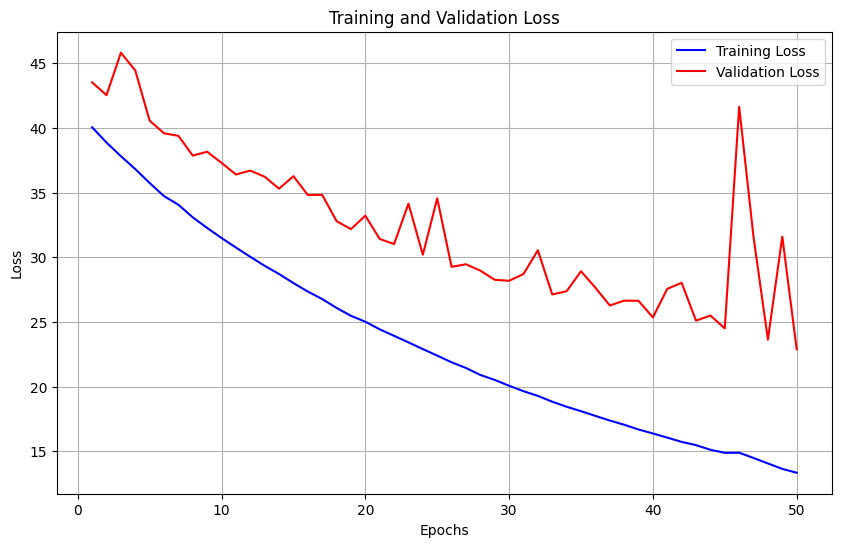

In [60]:
plot_training_history(history)

`The consistently decreasing loss in 2 Plots shows that the model is training very well.`

# Evaluation

In [43]:
!pip install --upgrade jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 1.2 MB/s eta 0:00:00a 0:00:01m


In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import jiwer 

# Load the best model weights
evaluation_model = build_crnn_model()
evaluation_model.load_weights('best_ocr_model.keras')

def decode_batch(predictions, num_to_char_map):
    """
    Decodes the predictions of the CRNN model using greedy search
    and the correct character mapping.
    """
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    results = K.ctc_decode(predictions, input_length=input_len, greedy=True)[0][0]
    output_text = []
    
    for res in results.numpy():
        # Filter out the special `-1` token and map back to characters
        text = ''.join([num_to_char_map[c] for c in res if c != -1])
        output_text.append(text)
    return output_text

# Get predictions on the validation data (x_val)
val_preds = evaluation_model.predict(x_val)
decoded_preds = decode_batch(val_preds, num_to_char)

# Convert validation ground truth (y_val) to readable text
val_ground_truth = []
for labels in y_val: # y_val here is the encoded version
    text = ''.join([num_to_char.get(c, '') for c in labels])
    val_ground_truth.append(text)

# Print some examples to verify the decoding is working
print("--- Verification of Decoding ---")
for i in range(10):
    print(f"True: {val_ground_truth[i]:<25} | Predicted: {decoded_preds[i]}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step
--- Verification of Decoding ---
True: 740 شارع غريت مالفيرن متفرع من ميلتون روس في ٤٢٦ منشية كفر سوم | Predicted: 185 شارع م الر متفرع من ن ا في ١ي١  الوي
True: 758 شارع ريسلي متفرع من أوصرة في ١٣٦٠ المخيزن | Predicted: 758 شارع ريسلي متفرع من أوصرة في ١٣٦٠ المخين
True: 1536 شارع الهرمشية متفرع من عميرة في ١٠١٨ أبو الهوى | Predicted: 1528 شارع الهرمشية متفرع من عميرة في ١٠١٨ أبو الهوى
True: 1465 شارع الصوالحة متفرع من النزهة في ٣٢٥ كوم الرف | Predicted: 1445 شارع الصوالحة متفرع من النزهة في ٢٢٥ كوم الرف
True: 276 شارع المعطن متفرع من مرحبا في ١٠٤٢ المرزة | Predicted: 272 شارع المعن متفرع من مرحبا في ١٠٠٢ المرزة
True: 1153 شارع ميدليسبرا متفرع من ويتون في ٩٠٤ غيفنوك | Predicted: 1153 شارع ميدليسبرا متفرع من ويتون في ٦٤ غيفوك
True: 121 شارع بيرستويك متفرع من درجة سعد في ٥٠٦ خربة خو | Predicted: 221 شارع بيريستويك متفرع من درة سعد في ٥٦٠ خربة رو
True: 1580 شارع طالب متفرع من سوث بانك في ١٠٤٤ المشرفة | Predicted: 1520 شارع طباب متفرع من سوث بانك 

In [62]:
# --- Final OCR Model Evaluation using jiwer ---
# Calculate Character Error Rate (CER)
cer = jiwer.cer(val_ground_truth, decoded_preds)

# Calculate Word Error Rate (WER)
wer = jiwer.wer(val_ground_truth, decoded_preds)

print("\n--- Final OCR Model Evaluation ---")
print(f"Character Error Rate (CER): {cer:.4f}")
print(f"Word Error Rate (WER): {wer:.4f}")


--- Final OCR Model Evaluation ---
Character Error Rate (CER): 0.1316
Word Error Rate (WER): 0.3663


In [ ]:
* Thats Great

# Save Model Without CTC Layer

In [58]:
# Create an instance of the prediction model (the one without the CTCLayer)
prediction_model = build_crnn_model()

# Copy the best weights from the trained model to the prediction model
prediction_model.set_weights(training_model.get_weights())

# Now, save the prediction model. This will not have the CTCLayer.
prediction_model.save('best_ocr_model.keras')

# Gradio APP

In [48]:
!pip install gradio

In [63]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import cv2
from PIL import Image 

# --- Model and Decoding Setup ---
try:
    keras_model = tf.keras.models.load_model('best_ocr_model.keras')
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please make sure 'best_ocr_model.keras' is in the current directory.")
    keras_model = None

# Define the character mapping (vocab) used during training
# IMPORTANT: This must be the exact same list used for preprocessing.
char_list_cleaned = [
    ' ', 'أ', 'إ', 'آ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر',
    'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م',
    'ن', 'ه', 'و', 'ي', 'ى', 'ء', 'ئ', 'ؤ', 'ة', 'ى', '٠', '١', '٢', '٣',
    '٤', '٥', '٦', '٧', '٨', '٩', '0', '1', '2', '3', '4', '5', '6', '7',
    '8', '9'
]
num_to_char = {idx: char for idx, char in enumerate(char_list_cleaned)}

def decode_predictions(predictions):
    """
    Decodes the raw model predictions into a human-readable string.
    """
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    results = K.ctc_decode(predictions, input_length=input_len, greedy=True)[0][0]
    
    output_text = []
    for res in results.numpy():
        text = ''.join([num_to_char[c] for c in res if c != -1])
        output_text.append(text)
    return output_text[0] # Return the first (and only) item in the batch

def preprocess_image(image):
    """
    Prepares the input image for the CRNN model.
    """
    # Check if the image is a PIL Image and convert it to a NumPy array if necessary.
    if isinstance(image, Image.Image):
        image = np.array(image)
        # Handle alpha channel if present
        if image.shape[-1] == 4:
            image = image[..., :3]

    # Convert to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Resize to the required input shape (80, 500)
    resized_img = cv2.resize(gray_img, (500, 80))
    
    # Normalize pixel values
    preprocessed_img = resized_img / 255.0
    
    # Add batch and channel dimensions
    preprocessed_img = np.expand_dims(preprocessed_img, axis=-1)
    preprocessed_img = np.expand_dims(preprocessed_img, axis=0)
    
    return preprocessed_img

def predict_ocr(image):
    """
    The main prediction function for the Gradio interface.
    """
    if keras_model is None:
        return "Error: Model not loaded."
    
    try:
        # Preprocess the input image
        preprocessed_image = preprocess_image(image)
        
        # Get predictions from the model
        predictions = keras_model.predict(preprocessed_image)
        
        # Decode the predictions to text
        decoded_text = decode_predictions(predictions)
        
        return decoded_text
    except Exception as e:
        return f"An error occurred during prediction: {e}"

# --- Gradio Interface Setup ---
# Define the input and output components
input_image = gr.Image(type="pil", label="Upload an Image")
output_text = gr.Textbox(label="Recognized Text")

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_ocr,
    inputs=input_image,
    outputs=output_text,
    title="Arabic OCR Model Deployment",
    description="Upload an image containing Arabic text to see the model's prediction."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7864
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://ff3e390d2e8da77297.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


# Thanks